# Stock Analysis

https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import math
import numpy as np

# Loading Apple Dataset

We will extract Apple Stocks Price (AAPPL) using the following codes

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

In [3]:
df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275
2017-01-12,119.300003,118.209999,118.900002,119.250000,27086200.0,114.257195


# Start Learning and Analyzing Stocks

To start learning and analyzing stocks, we will start off by taking a quick look at the historical stocks prices. 
- This will be done by extracting latest stocks data from pandas web-data reader and Yahoo Finance. 
- Then we will try to view the data through exploratory analysis such as 
 - correlation heatmap,
 - matplotlib visualization, and 
 - prediction analysis using Linear Analysis and K Nearest Neighbor (KNN).

# Exploring Rolling Mean and Return Rate of Stocks

### Rolling mean/Moving Average (MA)

It smooths out price data by creating a constantly updated average price.

Advantages:
- This is useful to cut down “noise” in our price chart.
- It act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it will follow the trend and less likely to deviate outside its resistance point.

https://www.investopedia.com/terms/a/averageprice.asp

In [4]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [5]:
mavg.tail(10)

Date
2016-12-29    106.925071
2016-12-30    106.997562
2017-01-03    107.080935
2017-01-04    107.163730
2017-01-05    107.249795
2017-01-06    107.335924
2017-01-09    107.433354
2017-01-10    107.533458
2017-01-11    107.641030
2017-01-12    107.741141
Name: Adj Close, dtype: float64

For better understanding, let’s plot it out with Matplotlib. We will overlay the Moving Average with our Stocks Price Chart.

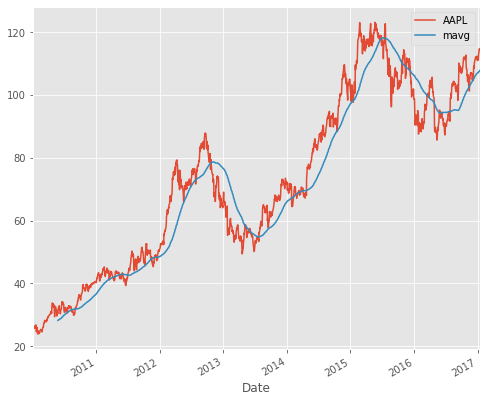

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

### Return Deviation to determine risk and return


Expected Return measures the mean, or expected value, of the probability distribution of investment returns.

In [7]:
rets = close_px / close_px.shift(1) - 1

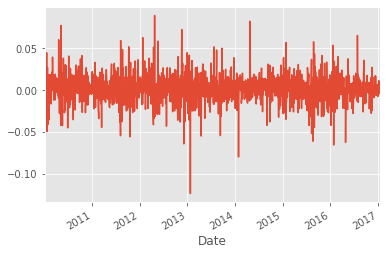

In [8]:
rets.plot(label='return')

Logically, our ideal stocks should return as high and stable as possible. If you are risk averse(like me), you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of the stocks and competitor analysis.

# Analysing your Competitors Stocks

Let’s assume we are interested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [9]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-06,112.973305,28.021051,806.150024,150.751312,59.743763
2017-01-09,114.008080,27.888081,806.650024,149.079559,59.553616
2017-01-10,114.123047,27.808300,804.789978,147.185501,59.534603
2017-01-11,114.736275,27.896944,807.909973,149.168472,60.076519
2017-01-12,114.257195,27.826027,806.359985,149.346359,59.525097


### Correlation Analysis — Does one competitor affect others?

We can analyse the competition by running the percentage change and correlation function in pandas. 

In [10]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

Percentage change will find how much the price changes compared to the previous day which defines returns

In [11]:
retscomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-06,0.011148,0.002855,0.015277,0.004920,0.008668
2017-01-09,0.009159,-0.004745,0.000620,-0.011089,-0.003183
2017-01-10,0.001008,-0.002861,-0.002306,-0.012705,-0.000319
2017-01-11,0.005373,0.003188,0.003877,0.013473,0.009103
2017-01-12,-0.004175,-0.002542,-0.001919,0.001193,-0.009179


Knowing the correlation will help us see whether the returns are affected by other stocks’ returns

In [12]:
corr.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.381475,0.411708,0.383816,0.393525
GE,0.381475,1.000000,0.422261,0.535149,0.474111
GOOG,0.411708,0.422261,1.000000,0.403004,0.472081
IBM,0.383816,0.535149,0.403004,1.000000,0.496582
MSFT,0.393525,0.474111,0.472081,0.496582,1.000000


Text(0, 0.5, 'Returns GE')

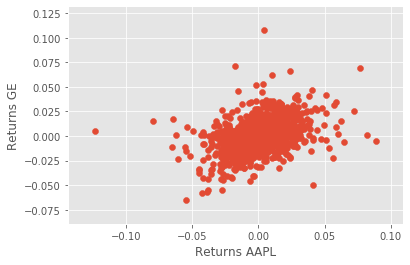

In [13]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

We can see here that there are slight positive correlations among GE returns and Apple returns. It seems like that the higher the Apple returns, the higher GE returns as well for most cases.

Text(0, 0.5, 'Returns GOOG')

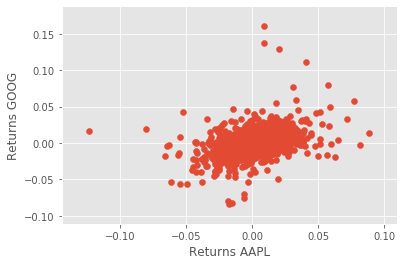

In [14]:
plt.scatter(retscomp.AAPL, retscomp.GOOG)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GOOG')

### scatter_matrix to visualize possible correlations among competing stocks. 

Let us further improve our analysis by plotting the scatter_matrix to visualize possible correlations among competing stocks. 

At the diagonal point, we will run Kernel Density Estimate (KDE). 

KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. 

It helps generate estimations of the overall distributions.

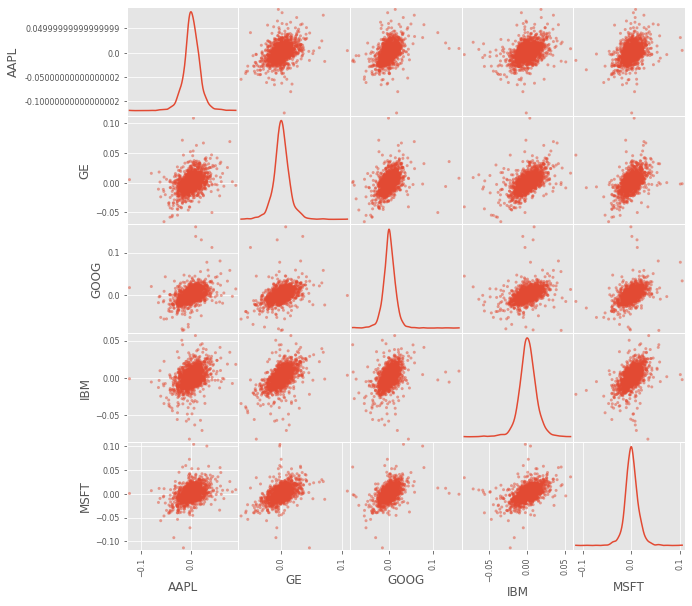

In [15]:
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

From here we could see most of the distributions among stocks which approximately positive correlations.

### Heat Maps


To prove the positive correlations, we will use heat maps to visualize the correlation ranges among the competing stocks. 

Notice that the lighter the color, the more correlated the two stocks are.

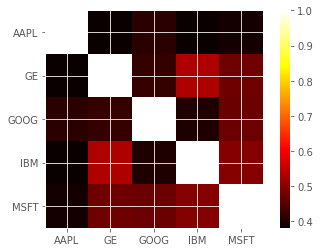

In [16]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

From the Scatter Matrix and Heatmap, we can find great correlations among the competing stocks. 

However, this might not show causality, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

## Stocks Returns Rate and Risk

Apart from correlation, we also analyse each stock’s risks and returns.

In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk).

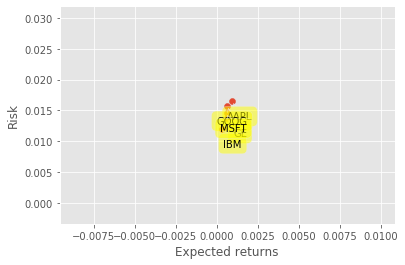

In [17]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Logically, you would like to minimize the risk and maximize returns. 

Follow the rules:

- Therefore, you would want to draw the line for your risk-return tolerance (The red line).

- You would then create the rules to buy those stocks under the red line (MSFT, GE, and IBM) and sell those stocks above the red line (AAPL and GOOG). 

This red line showcases your expected value threshold and your baseline for buy/sell decision

# Predicting Stocks Price

We will use these three machine learning models to predict our stocks: 
 - Simple Linear Analysis, 
 - Quadratic Discriminant Analysis (QDA), and 
 - K Nearest Neighbor (KNN). 
 
But first, let us engineer some features: 

#### High Low Percentage and Percentage Change.


In [18]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [19]:
dfreg.tail(10)

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2016-12-29,111.842705,15039500.0,0.608240,0.240452
2016-12-30,110.970810,30586300.0,1.528231,-0.711532
2017-01-03,111.286987,28781900.0,1.351700,0.302244
2017-01-04,111.162437,21118100.0,0.655061,0.146740
2017-01-05,111.727715,22193600.0,0.900440,0.595240
2017-01-06,112.973305,31751900.0,1.433299,0.967636
2017-01-09,114.008080,33561900.0,1.252204,0.881730
2017-01-10,114.123047,24462100.0,0.906720,0.286271
2017-01-11,114.736275,27588600.0,1.110649,0.850600


### Pre-processing & Cross Validation

We will clean up and process the data using the following steps before putting them into the prediction models:
1. Drop missing value
2. Separating the label here, we want to predict the AdjClose
3. Scale the X so that everyone can have the same distribution for linear regression
4. Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
5. Separate label and identify it as y
6. Separation of training and testing of model by cross validation train test split

In [20]:
from sklearn import preprocessing

In [21]:
# 1. Drop missing value
dfreg.fillna(value=-99999, inplace=True)

# 2a. We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# 2b. Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))


In [22]:
# 3.Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# 4. Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# 5. Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


### Model Generation — Where the prediction fun starts

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X.shape

(1752, 4)

In [26]:
y.shape

(1752,)

In [27]:
X.shape[0] != y.shape[0]

False

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_test.shape

(351, 4)

In [30]:
y_test.shape

(351,)

### Simple Linear Analysis & Quadratic Discriminant Analysis

Simple Linear Analysis 
- It shows a linear relationship between two or more variables.
- When we draw this relationship within two variables, we get a straight line.

Quadratic Discriminant Analysis 
- It would be similar to Simple Linear Analysis, except that the model allowed polynomial (e.g: x squared) and
- It would produce curves.

#### There are two types of supervised machine learning algorithms: 
####  - Regression and classification.

For instance,
- predicting the price of a house in dollars is a regression problem whereas 
- predicting whether a tumor is malignant or benign is a classification problem.

Our next step is to divide the data into “attributes” and “labels”. 

Attributes are the independent variables while labels are dependent variables whose values are to be predicted.

In our dataset, we only have two columns.

### Linear Regression

Linear Regression predicts dependent variables (y) as the outputs given independent variables (x) as the inputs. 

X is x_train
y is y_train

In [31]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [32]:
#To retrieve the intercept:
print("Intercept: "+str(clfreg.intercept_))
#For retrieving the slope:
print("Slope: "+ str(clfreg.coef_))

Intercept: 73.16852262550383
Slope: [26.15844166 -1.59116774  0.85756098 -0.06990756]


### Quadratic Regression 2

In [33]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

### Quadratic Regression 3

In [34]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

### K Nearest Neighbor (KNN)

This KNN uses feature similarity to predict values of data points.  

This ensures that the new point assigned is similar to the points in the data set.

To find out similarity, we will extract the points to release the minimum distance (e.g: Euclidean Distance)

In [35]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

## Evaluation

The score method finds the mean accuracy of self.predict(X) with y of the test data set.

In [37]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [38]:
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.96677610502804
The quadratic regression 2 confidence is  0.9565327434059515
The quadratic regression 3 confidence is  0.9237285676757058
The knn regression confidence is  0.9352220188286084


For sanity testing, let us print some of the stocks forecast.

In [40]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

In [42]:
forecast_set

array([110.40201825, 111.87522139, 111.8435585 , 111.75338281,
       111.16687569, 111.68038577, 112.48894572, 112.35623333,
       111.74099381, 111.22678153, 111.39190654, 110.97402761,
       111.63825213, 112.93856492, 113.74459502, 113.872339  ,
       114.49142236, 113.93525417])

## Plotting the Prediction

Based on the forecast, we will visualize the plot with our existing historical data. 

This will help us visualize how the model fares to predict future stocks pricing.

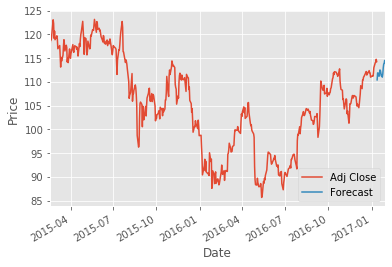

In [43]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()